In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


%matplotlib inline


In [3]:
from sklearn.metrics import roc_curve, roc_auc_score


In [4]:
df = pd.read_csv("../data/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape


(891, 12)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.drop(columns=['Cabin'], inplace=True)


In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [10]:
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [11]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(
    lambda x: x.fillna(x.median())
)


In [12]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.to_csv("../data/cleaned_titanic.csv", index=False)


In [14]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [15]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [16]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df['Title'] = df['Title'].replace([
    'Lady', 'Countess','Capt', 'Col','Don', 'Dr',
    'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'
], 'Rare')

df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})


In [17]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 60, 100],
    labels=['Child', 'Teen', 'Adult', 'Senior']
)


In [18]:
df['FarePerPerson'] = df['Fare'] / df['FamilySize']


In [19]:
df.drop(columns=['Name', 'Ticket'], inplace=True)


In [20]:
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeGroup,FarePerPerson
0,1,0,3,male,22.0,1,0,7.2500,S,2,0,Mr,Adult,3.62500
1,2,1,1,female,38.0,1,0,71.2833,C,2,0,Mrs,Adult,35.64165
2,3,1,3,female,26.0,0,0,7.9250,S,1,1,Miss,Adult,7.92500
3,4,1,1,female,35.0,1,0,53.1000,S,2,0,Mrs,Adult,26.55000
4,5,0,3,male,35.0,0,0,8.0500,S,1,1,Mr,Adult,8.05000


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    object  
 9   FamilySize     891 non-null    int64   
 10  IsAlone        891 non-null    int32   
 11  Title          891 non-null    object  
 12  AgeGroup       891 non-null    category
 13  FarePerPerson  891 non-null    float64 
dtypes: category(1), float64(3), int32(1), int64(6), object(3)
memory usage: 88.2+ KB


In [22]:
df.to_csv("../data/featured_titanic.csv", index=False)


Question: Did gender influence survival probability?
Hypothesis: Women had higher survival due to evacuation priority.

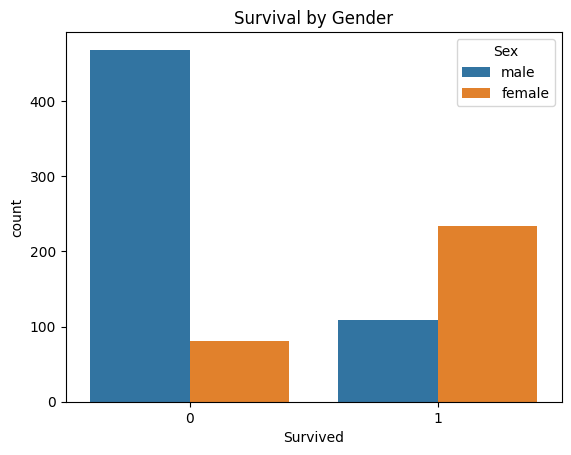

In [23]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()


Age Distribution vs Survival (Critical Insight)
Younger passengers showed higher survival probability, especially children.

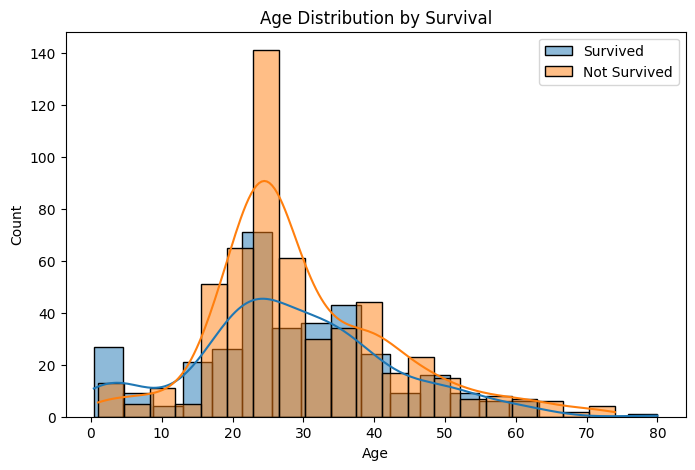

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Survived']==1]['Age'], kde=True, label='Survived')
sns.histplot(df[df['Survived']==0]['Age'], kde=True, label='Not Survived')
plt.legend()
plt.title("Age Distribution by Survival")
plt.show()


Family Size vs Survival 

Medium-sized families had better survival than solo travelers or very large families.

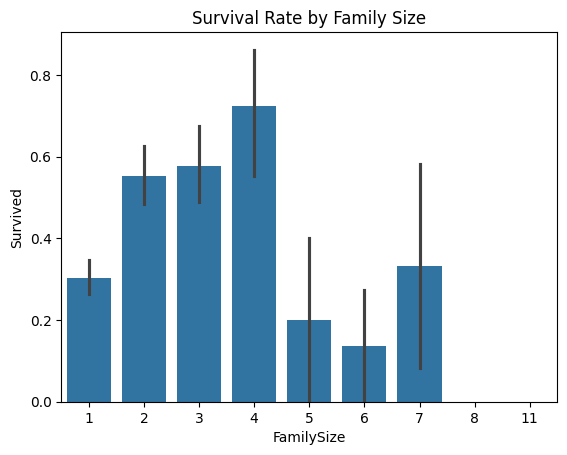

In [25]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()


Fare Per Person vs Survival

Higher fare per person correlates with increased survival, likely due to cabin location and access.

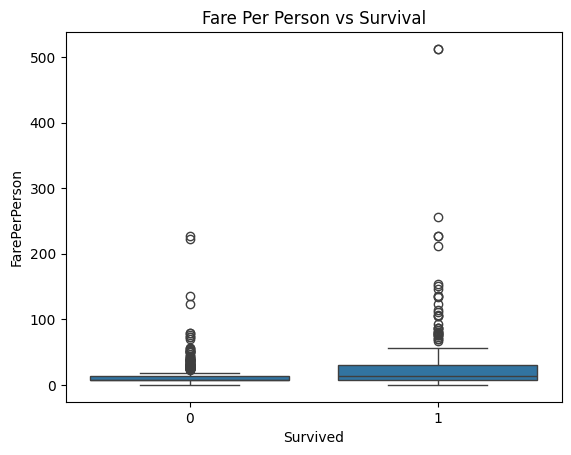

In [26]:
sns.boxplot(x='Survived', y='FarePerPerson', data=df)
plt.title("Fare Per Person vs Survival")
plt.show()


Age Group × Class Heatmap

C:\Users\Admin\AppData\Local\Temp\ipykernel_14956\1530134495.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='Survived', index='AgeGroup', columns='Pclass', aggfunc='mean')


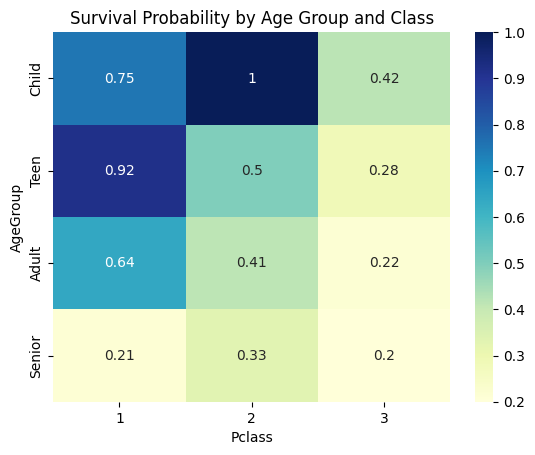

In [27]:
pivot = df.pivot_table(values='Survived', index='AgeGroup', columns='Pclass', aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title("Survival Probability by Age Group and Class")
plt.show()


In [28]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [29]:
X = pd.get_dummies(X, drop_first=True)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [35]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



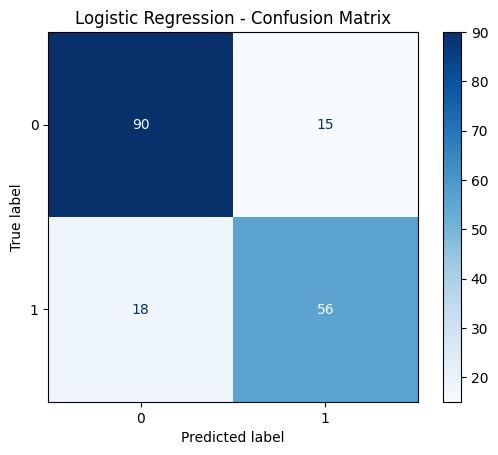

In [36]:
cm_lr = confusion_matrix(y_test, lr_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [ ]:



from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1️⃣ Get the best trained Logistic Regression model
best_lr = grid_lr.best_estimator_

# 2️⃣ Get probability predictions
lr_probs = best_lr.predict_proba(X_test)[:, 1]

# 3️⃣ Calculate ROC values
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_probs)

# 4️⃣ Calculate AUC score
auc_lr = roc_auc_score(y_test, lr_probs)

# 5️⃣ Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], 'k--')   # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# 6️⃣ Print AUC score
print("Logistic Regression ROC-AUC Score:", auc_lr)


NameError: name 'grid_lr' is not defined

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



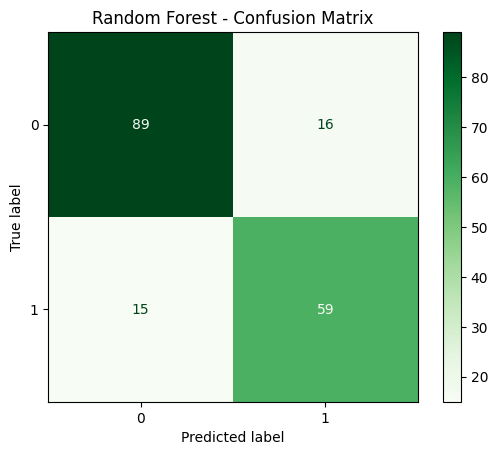

In [ ]:
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.show()


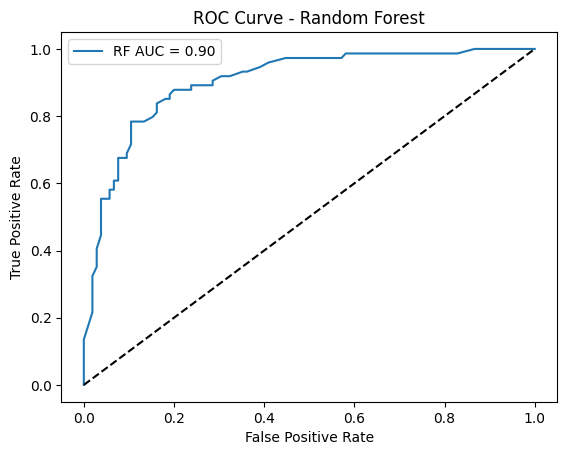

In [ ]:
rf_probs = rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

plt.plot(fpr_rf, tpr_rf, label=f'RF AUC = {auc_rf:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance


,Feature,Importance
0,PassengerId,0.143364
5,Fare,0.123887
8,FarePerPerson,0.122879
9,Sex_male,0.120662
2,Age,0.118437
13,Title_Mr,0.111058
1,Pclass,0.055516
14,Title_Mrs,0.037169
6,FamilySize,0.036774
12,Title_Miss,0.030371


In [ ]:




from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# SVM pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
])

# Train model
svm_pipeline.fit(X_train, y_train)

svm_pred = svm_pipeline.predict(X_test)



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.7932960893854749
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



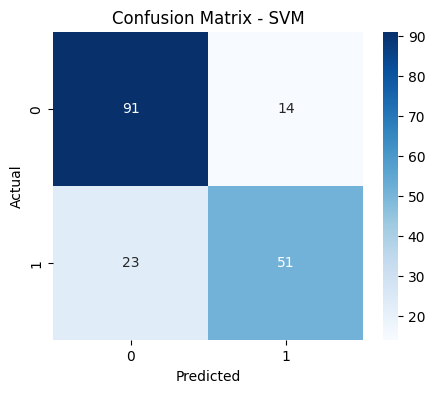

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [ ]:


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = svm_pipeline.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

cv_scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')

print("CV Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

CV Scores: [0.82122905 0.82022472 0.80898876 0.79213483 0.85955056]
Mean CV Accuracy: 0.8204255853367648


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


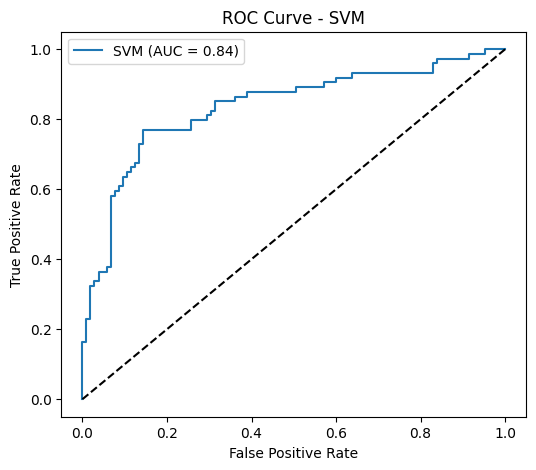

ROC-AUC Score: 0.8355212355212356


In [ ]:



from sklearn.metrics import roc_curve, roc_auc_score


y_probs = svm_pipeline.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

print("ROC-AUC Score:", auc_score)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='accuracy'
)

grid_lr.fit(X_train, y_train)

print("Best Parameters:", grid_lr.best_params_)
print("Best CV Score:", grid_lr.best_score_)


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score: 0.8300305328474342


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 0.1, 1],
    'svm__kernel': ['rbf']
}

grid_svm = GridSearchCV(
    svm_pipeline,
    param_grid_svm,
    cv=5,
    scoring='accuracy'
)

grid_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("Best SVM CV Score:", grid_svm.best_score_)


Best SVM Params: {'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best SVM CV Score: 0.8342164877376146


In [ ]:
best_svm = grid_svm.best_estimator_

svm_final_pred = best_svm.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Final SVM Accuracy:", accuracy_score(y_test, svm_final_pred))
print(classification_report(y_test, svm_final_pred))


Final SVM Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
import pickle

pickle.dump(rf, open('titanicmodel.pkl', 'wb'))


In [38]:
import pickle

# Save the trained Random Forest
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save the StandardScaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save the feature columns
feature_columns = X.columns.tolist()
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)
